In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data PreProcessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train-perceptron.txt to train-perceptron.txt


In [ ]:
train_data = '/content/pattern_1/train.txt'
test_data = '/content/pattern_1/test.txt'

In [ ]:
data_train = np.loadtxt(train_data,dtype=int)
data_train = np.array(data_train,dtype=int)
data_train

array([[ 2,  2,  1],
       [ 3,  1,  1],
       [-4,  3,  2],
       [ 3,  3,  1],
       [-1, -3,  1],
       [ 2,  6,  2],
       [ 4,  2,  1],
       [-2, -2,  1],
       [ 0,  0,  2],
       [-2,  2,  2],
       [-1, -1,  2],
       [-4,  2,  2]])

In [ ]:
data_test = np.loadtxt(test_data,dtype=int)
data_test = np.array(data_test,dtype=int)
data_test

array([[-1, -5,  1],
       [ 3,  2,  1],
       [-2,  1,  2],
       [ 8,  2,  1],
       [ 6, -1,  1],
       [ 0,  2,  1],
       [-3,  0,  2]])

### TASK - 1

In [ ]:
A_class = []
B_class = []
AB_class = []

for indx in data_train:
  if indx[2] == 1 : 
    A_class.append([indx[0],indx[1]])
    AB_class.append(indx[2])
  else :
    B_class.append([indx[0],indx[1]])
    AB_class.append(indx[2])

In [ ]:
A_class = np.array(A_class,dtype=int)
B_class = np.array(B_class,dtype=int)
print(A_class, B_class, sep='\n---------------\n')

[[ 2  2]
 [ 3  1]
 [ 3  3]
 [-1 -3]
 [ 4  2]
 [-2 -2]]
---------------
[[-4  3]
 [ 2  6]
 [ 0  0]
 [-2  2]
 [-1 -1]
 [-4  2]]


In [ ]:
type(A_class)
A_class[:,1]

array([ 2,  1,  3, -3,  2, -2])

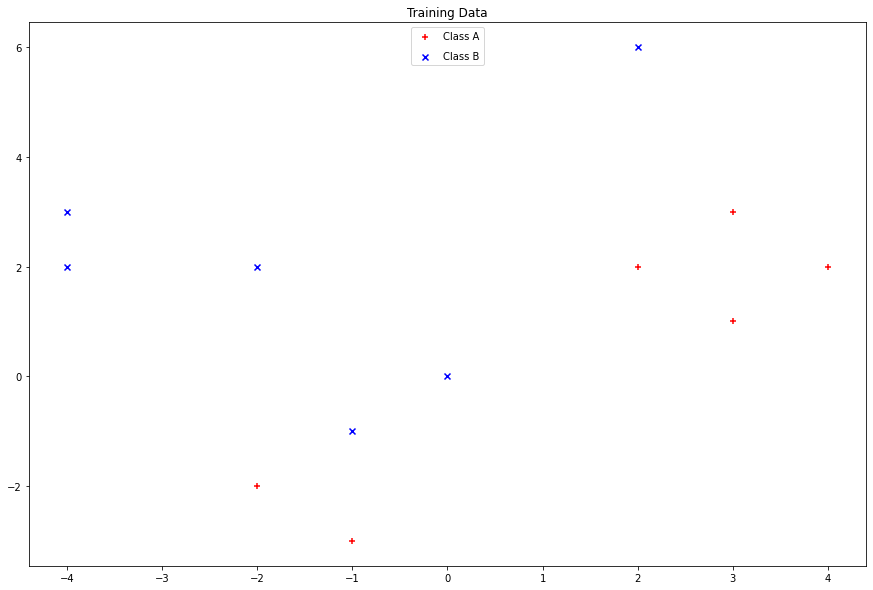

In [ ]:
fig, ax = plt.subplots(1,1,squeeze=True)
# label
ax.set_title('Training Data')
#height,width
fig.set_figheight(10)
fig.set_figwidth(15)
# plotting axis
ax.scatter(A_class[:,0],A_class[:,1],marker='+',color='r',label='Class A')
ax.scatter(B_class[:,0],B_class[:,1],marker='x',color='b',label='Class B')
legend = ax.legend(loc='upper center', shadow=False, fontsize='medium',labelspacing=1)
legend.get_frame().set_facecolor('None')
plt.show()

### TASK - 2

In [ ]:
# Test Set Analysis
test_set = []
test_set_class = []
for indx in data_test:
  test_set.append([indx[0],indx[1]])
  test_set_class.append(indx[2])
test_set = np.array(test_set,dtype=int)
test_set_class = np.array(test_set_class,dtype=int)

In [ ]:
# mean column wise 
A_mean = np.mean(A_class,axis=0)
B_mean = np.mean(B_class,axis=0)
print(A_mean,B_mean,sep='\n-------\n')


[1.5 0.5]
-------
[-1.5  2. ]


In [ ]:
predicted_A = []
predicted_B = []
prediction_class = []

In [ ]:
# Discriminant Fucntion 

for i in range(len(data_test)):
  A_x = np.dot(np.transpose(test_set[i]),test_set[i]) + (0.25 * np.dot(np.transpose(A_mean),test_set[i])) - (0.25 * np.dot(np.transpose(A_mean),A_mean))
  B_x = np.dot(np.transpose(test_set[i]),test_set[i]) + (0.25 * np.dot(np.transpose(B_mean),test_set[i])) - (0.25 * np.dot(np.transpose(B_mean),B_mean))
  if A_x > B_x :
    predicted_A.append([int(test_set[i,0]),int(test_set[i,1]),int(1)])
    prediction_class.append(int(1))
  else :
    predicted_B.append([int(test_set[i,0]),int(test_set[i,1]),int(2)])
    prediction_class.append(int(2))

In [ ]:
predicted_A = np.array(predicted_A,dtype=int)
predicted_B = np.array(predicted_B,dtype=int)
prediction_class = np.array(prediction_class,dtype=int)

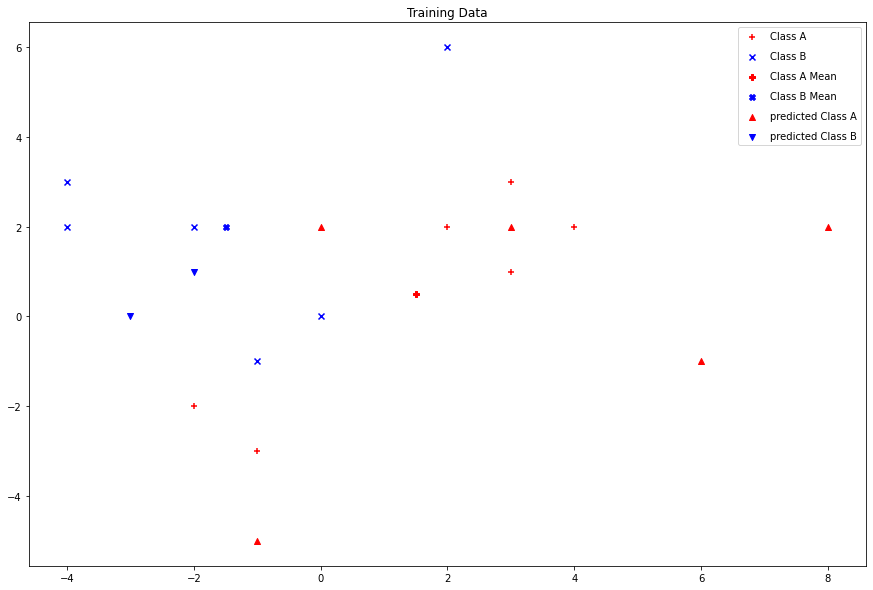

In [ ]:
fig, ax = plt.subplots(1,1,squeeze=True)
# label
ax.set_title('Training Data')
#height,width
fig.set_figheight(10)
fig.set_figwidth(15)
# plotting axis
ax.scatter(A_class[:,0],A_class[:,1],marker='+',color='r',label='Class A')
ax.scatter(B_class[:,0],B_class[:,1],marker='x',color='b',label='Class B')
ax.scatter(A_mean[0],A_mean[1],marker='P',color='r',label='Class A Mean')
ax.scatter(B_mean[0],B_mean[1],marker='X',color='b',label='Class B Mean')
ax.scatter(predicted_A[:,0],predicted_A[:,1],marker='^',color='r',label='predicted Class A')
ax.scatter(predicted_B[:,0],predicted_B[:,1],marker='v',color='b',label='predicted Class B')
legend = ax.legend(loc='upper right', shadow=False, fontsize='medium',labelspacing=1)
legend.get_frame().set_facecolor('None')
plt.show()

### TASK - 3

In [ ]:
co_e =np.array(A_mean) - np.array(B_mean)
co_e

array([ 3. , -1.5])

In [ ]:
C = -0.5*(np.array(A_mean).transpose().dot(np.array(A_mean)) - np.array(B_mean).transpose().dot(np.array(B_mean)))
C

1.875

In [ ]:
X=np.arange(-3,6,1)
X

array([-3, -2, -1,  0,  1,  2,  3,  4,  5])

In [ ]:
Y = [(co_e[0]*X[i]+C)/(-co_e[1]) for i in range(len(X))]
Y = np.array(Y)

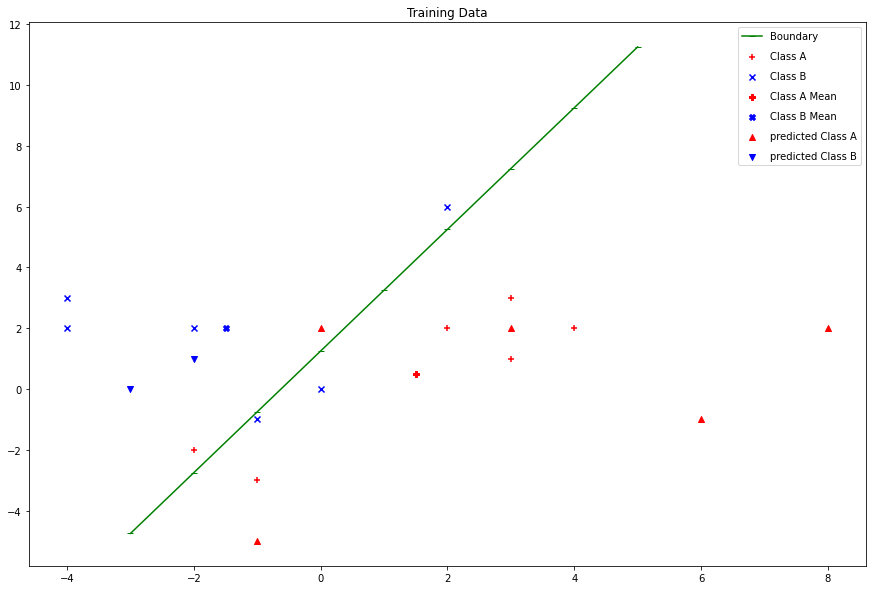

In [ ]:
fig, ax = plt.subplots(1,1,squeeze=True)
# label
ax.set_title('Training Data')
#height,width
fig.set_figheight(10)
fig.set_figwidth(15)
# plotting axis
ax.scatter(A_class[:,0],A_class[:,1],marker='+',color='r',label='Class A')
ax.scatter(B_class[:,0],B_class[:,1],marker='x',color='b',label='Class B')
ax.scatter(A_mean[0],A_mean[1],marker='P',color='r',label='Class A Mean')
ax.scatter(B_mean[0],B_mean[1],marker='X',color='b',label='Class B Mean')
ax.scatter(predicted_A[:,0],predicted_A[:,1],marker='^',color='r',label='predicted Class A')
ax.scatter(predicted_B[:,0],predicted_B[:,1],marker='v',color='b',label='predicted Class B')
# plotting Decisiion Boundary
ax.plot(X,Y,marker='_',color='g',label='Boundary')

legend = ax.legend(loc='upper right', shadow=False, fontsize='medium',labelspacing=1)
legend.get_frame().set_facecolor('None')
plt.show()

### TASK - 4


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ac = accuracy_score(test_set_class,prediction_class,normalize=True) * 100
print(ac)

100.0
